## Fit a linear model to some random numbers

This is nice and simple but makes sure that everything is running ok on your machine! Run all the cells and make sure you don't get any errors.

> This is the notebook for the first morning session. I'm using a `{am|pm}{1|2}-name-with-stuff.ipynb` naming scheme to make it easy for people to know what to look for where.

In [265]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

seaborn.set()
colors = seaborn.palettes.get_color_cycle()

Make some data

In [273]:
# Parameters
alpha, beta, gamma = -0.3, 1.3, 1
epsilon = 0.8
npoints = 30

# Functions
sinc = lambda x: np.sin(np.pi * x) / x
actual = lambda x: alpha + beta * sinc(x) + gamma * x

In [274]:
# Generate data
df = pd.DataFrame()
df['x'] = np.random.uniform(0, 5, size=npoints)
noise = np.random.normal(loc=0, scale=epsilon, size=npoints)
df['y'] = alpha + beta * sinc(df.x) + gamma * df.x + noise

Plot the data

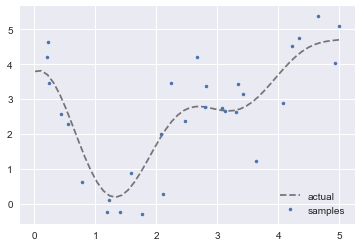

In [275]:
ax = plt.gca()
xs = np.linspace(0.01, 5)
ax.plot(xs, actual(xs), 'k--', alpha=0.5, label='actual')
ax.plot(df.x, df.y, '.', label='samples')
ax.legend()

Fit a regression using ordinary least squares and an 'R-style' function

In [276]:
model = smf.ols('y ~ sinc(x) + x', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     53.84
Date:                Mon, 17 Sep 2018   Prob (F-statistic):           3.78e-10
Time:                        14:14:00   Log-Likelihood:                -33.602
No. Observations:                  30   AIC:                             73.20
Df Residuals:                      27   BIC:                             77.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7888      0.370     -2.131      0.042      -1.548      -0.029
sinc(x)        1.5299      0.171      8.967      0.000       1.180       1.880
x              1.1420      0.121      9.449      0.000       0.894       1.390
==============================================================================
Omnibus:                        1.782   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.156
Skew:                          -0.481   Prob(JB):                        0.561
Kurtosis:                       3.016   Cond. No.                         8.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot the regression using seaborn

In [277]:
pred = lambda p, x: \
    p['Intercept'] + p['sinc(x)'] * sinc(x) + \
    p['x'] * x
xpred = np.linspace(0.01, 5)
ypred = pred(results.params, xpred)
yactual = actual(xpred)

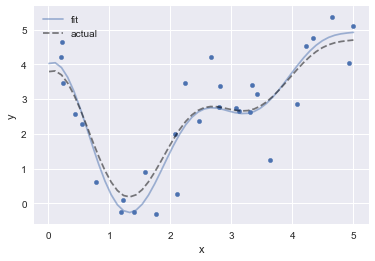

In [278]:
ax = df.plot('x', 'y', kind='scatter')
ax.plot(xpred, ypred, alpha=0.5, label='fit')
ax.plot(xpred, yactual, 'k--', alpha=0.5, label='actual')
ax.legend()

Check for uncorrelated errors

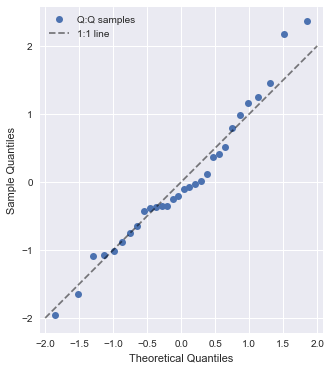

In [279]:
fig = sm.qqplot(pred(results.params, df.x) - df.y, 
          fit=True, color=colors[0], label='Q:Q samples')
ax = plt.gca()
ax.plot((-2, 2), (-2, 2), 'k--', alpha=0.5, label='1:1 line')
ax.set_aspect(1)
ax.legend()
fig.set_size_inches(6, 6)